In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 999)
from api_keys import g_key
import requests
import gmaps
import os
from pathlib import Path

In [2]:
file = Path("RAW DATA/NYC_Wi-Fi_Hotspot_Locations.csv")
data = pd.read_csv(file)
data

,OBJECTID,Borough,Type,Provider,Name,Location,Latitude,Longitude,X,Y,Location_T,Remarks,City,SSID,SourceID,Activated,BoroCode,Borough Name,Neighborhood Tabulation Area Code (NTACODE),Neighborhood Tabulation Area (NTA),Council Distrcit,Postcode,BoroCD,Census Tract,BCTCB2010,BIN,BBL,DOITT_ID,"Location (Lat, Long)"
0,10362,3,Limited Free,ALTICEUSA,Linden Park,IN PARK PLAYGROUND AREA,40.658385,-73.887583,1.015441e+06,179163.810029,Outdoor,3 free 10 min sessions,Brooklyn,GuestWiFi,NaN,09/09/9999,3,Brooklyn,BK82,East New York,42,11207,305,1104,1104,0,3043490001,217,"(40.658385, -73.8875829994)"
1,10447,4,Limited Free,SPECTRUM,Elmhurst Park,Park Area,40.728838,-73.883751,1.016470e+06,204833.279032,Outdoor TWC Aerial,3 free 10 min sessions,Queens,GuestWiFi,0,09/09/9999,4,Queens,QN29,Elmhurst,25,11373,404,499,499,0,0,824,"(40.7288380002, -73.8837509996)"
2,10605,3,Free,AT&T,Hillside Park,Near Vine St and Columbia Heights,40.701500,-73.994300,9.858305e+05,194851.884952,Outdoor,NaN,Brooklyn,attwifi,NaN,09/09/9999,3,Brooklyn,BK09,Brooklyn Heights-Cobble Hill,33,11201,302,1,1,0,3002050001,1409,"(40.7014999998, -73.9943000006)"
3,9753,3,Free,NYCHA,0,331 Myrtle Ave,40.693442,-73.973193,9.916838e+05,191917.129995,Outdoor,NaN,Brooklyn,DowntownBrooklynWiFi_Fon,NaN,09/09/9999,3,Brooklyn,BK68,Fort Greene,35,11205,302,18501,18501,3335255,3020410001,665,"(40.6934417997, -73.9731930998)"
4,9884,3,Free,Downtown Brooklyn,NaN,409 Fulton St.,40.692178,-73.988304,9.874935e+05,191455.769697,Outdoor,NaN,Brooklyn,Downtown Brooklyn WiFi,NaN,09/09/9999,3,Brooklyn,BK38,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,33,11201,302,11,11,3000281,3001440001,1028,"(40.6921780001, -73.9883039999)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,10310,4,Free,LinkNYC - Citybridge,qu-02-145981,43-01 48 AVENUE,40.739680,-73.922070,1.005846e+06,208771.678307,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Queens,LinkNYC Free Wi-Fi,LINK-021680,03/15/2018,4,Queens,QN31,Hunters Point-Sunnyside-West Maspeth,26,11377,402,185,185,4002100,4001730000,4715,"(40.7396802501, -73.9220696606)"
3315,12845,1,Free,LinkNYC - Citybridge,mn-08-134739,1345 E 78ST,40.772815,-73.958220,9.958220e+05,220836.761132,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",New York,LinkNYC Free Wi-Fi,LINK-000854,05/16/2016,1,Manhattan,MN31,Lenox Hill-Roosevelt Island,4,10021,108,134,134,1044091,1014310050,3349,"(40.77281462, -73.9582204299)"
3316,12360,3,Free,Transit Wireless,"Court St (M,R)/Borough Hall (2,3,4,5)","Court St (M,R)/Borough Hall (2,3,4,5)",40.694100,-73.991777,9.865303e+05,192155.901171,Subway Station,SN 24,Brooklyn,TransitWirelessWiFi,NaN,09/09/9999,3,Brooklyn,BK09,Brooklyn Heights-Cobble Hill,33,11201,302,9,9,0,0,1689,"(40.6940999996, -73.9917769995)"
3317,10268,3,Free,LinkNYC - Citybridge,bk-01-146010,145 WYTHE AVENUE,40.719404,-73.960474,9.952065e+05,201377.394867,Outdoor Kiosk,"Tablet Internet -phone , Free 1 GB Wi-FI Service",Brooklyn,LinkNYC Free Wi-Fi,LINK-021263,02/14/2018,3,Brooklyn,BK73,North Side-South Side,33,11249,301,555,555,3062048,3023260010,4673,"(40.7194043316, -73.9604743139)"


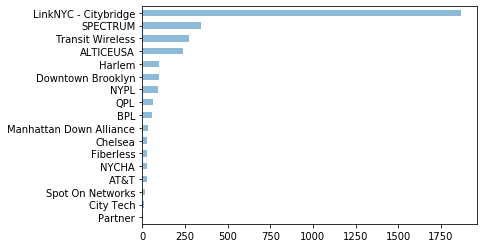

In [3]:
#How many different providers in NYC
provider = data["Provider"].value_counts(ascending=True)
provider.plot(kind="barh", alpha=0.5)
plt.show()

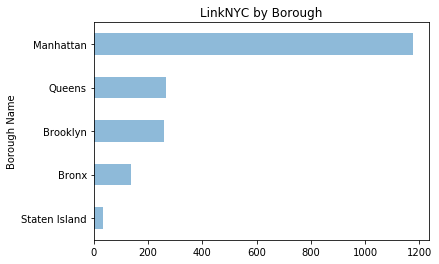

In [4]:
#How many specific providers in boroughs
prov = 'LinkNYC - Citybridge'
cond = (data['Provider'] == prov)
prov_by_borough = data[cond].groupby('Borough Name')["OBJECTID"].count()
prov_by_borough = prov_by_borough.sort_values(ascending=True)
prov_by_borough.plot(kind="barh", alpha=0.5, legend = False)
plt.title("LinkNYC by Borough")
#plt.ylabel("Borough")
#plt.axis("Number LinkNYC")
plt.show()

In [6]:
#Heat map. All providers in NYC.
gmaps.configure(api_key=g_key)
m = gmaps.Map()
locations = data[['Latitude','Longitude']]
weight = data['OBJECTID']
locations

,Latitude,Longitude
0,40.658385,-73.887583
1,40.728838,-73.883751
2,40.701500,-73.994300
3,40.693442,-73.973193
4,40.692178,-73.988304
...,...,...
3314,40.739680,-73.922070
3315,40.772815,-73.958220
3316,40.694100,-73.991777
3317,40.719404,-73.960474


In [7]:
#Setting up the map
m = gmaps.figure(map_type = 'HYBRID')
heat = gmaps.heatmap_layer(locations, weights=weight)
m.add_layer(heat)
m

Figure(layout=FigureLayout(height='420px'))

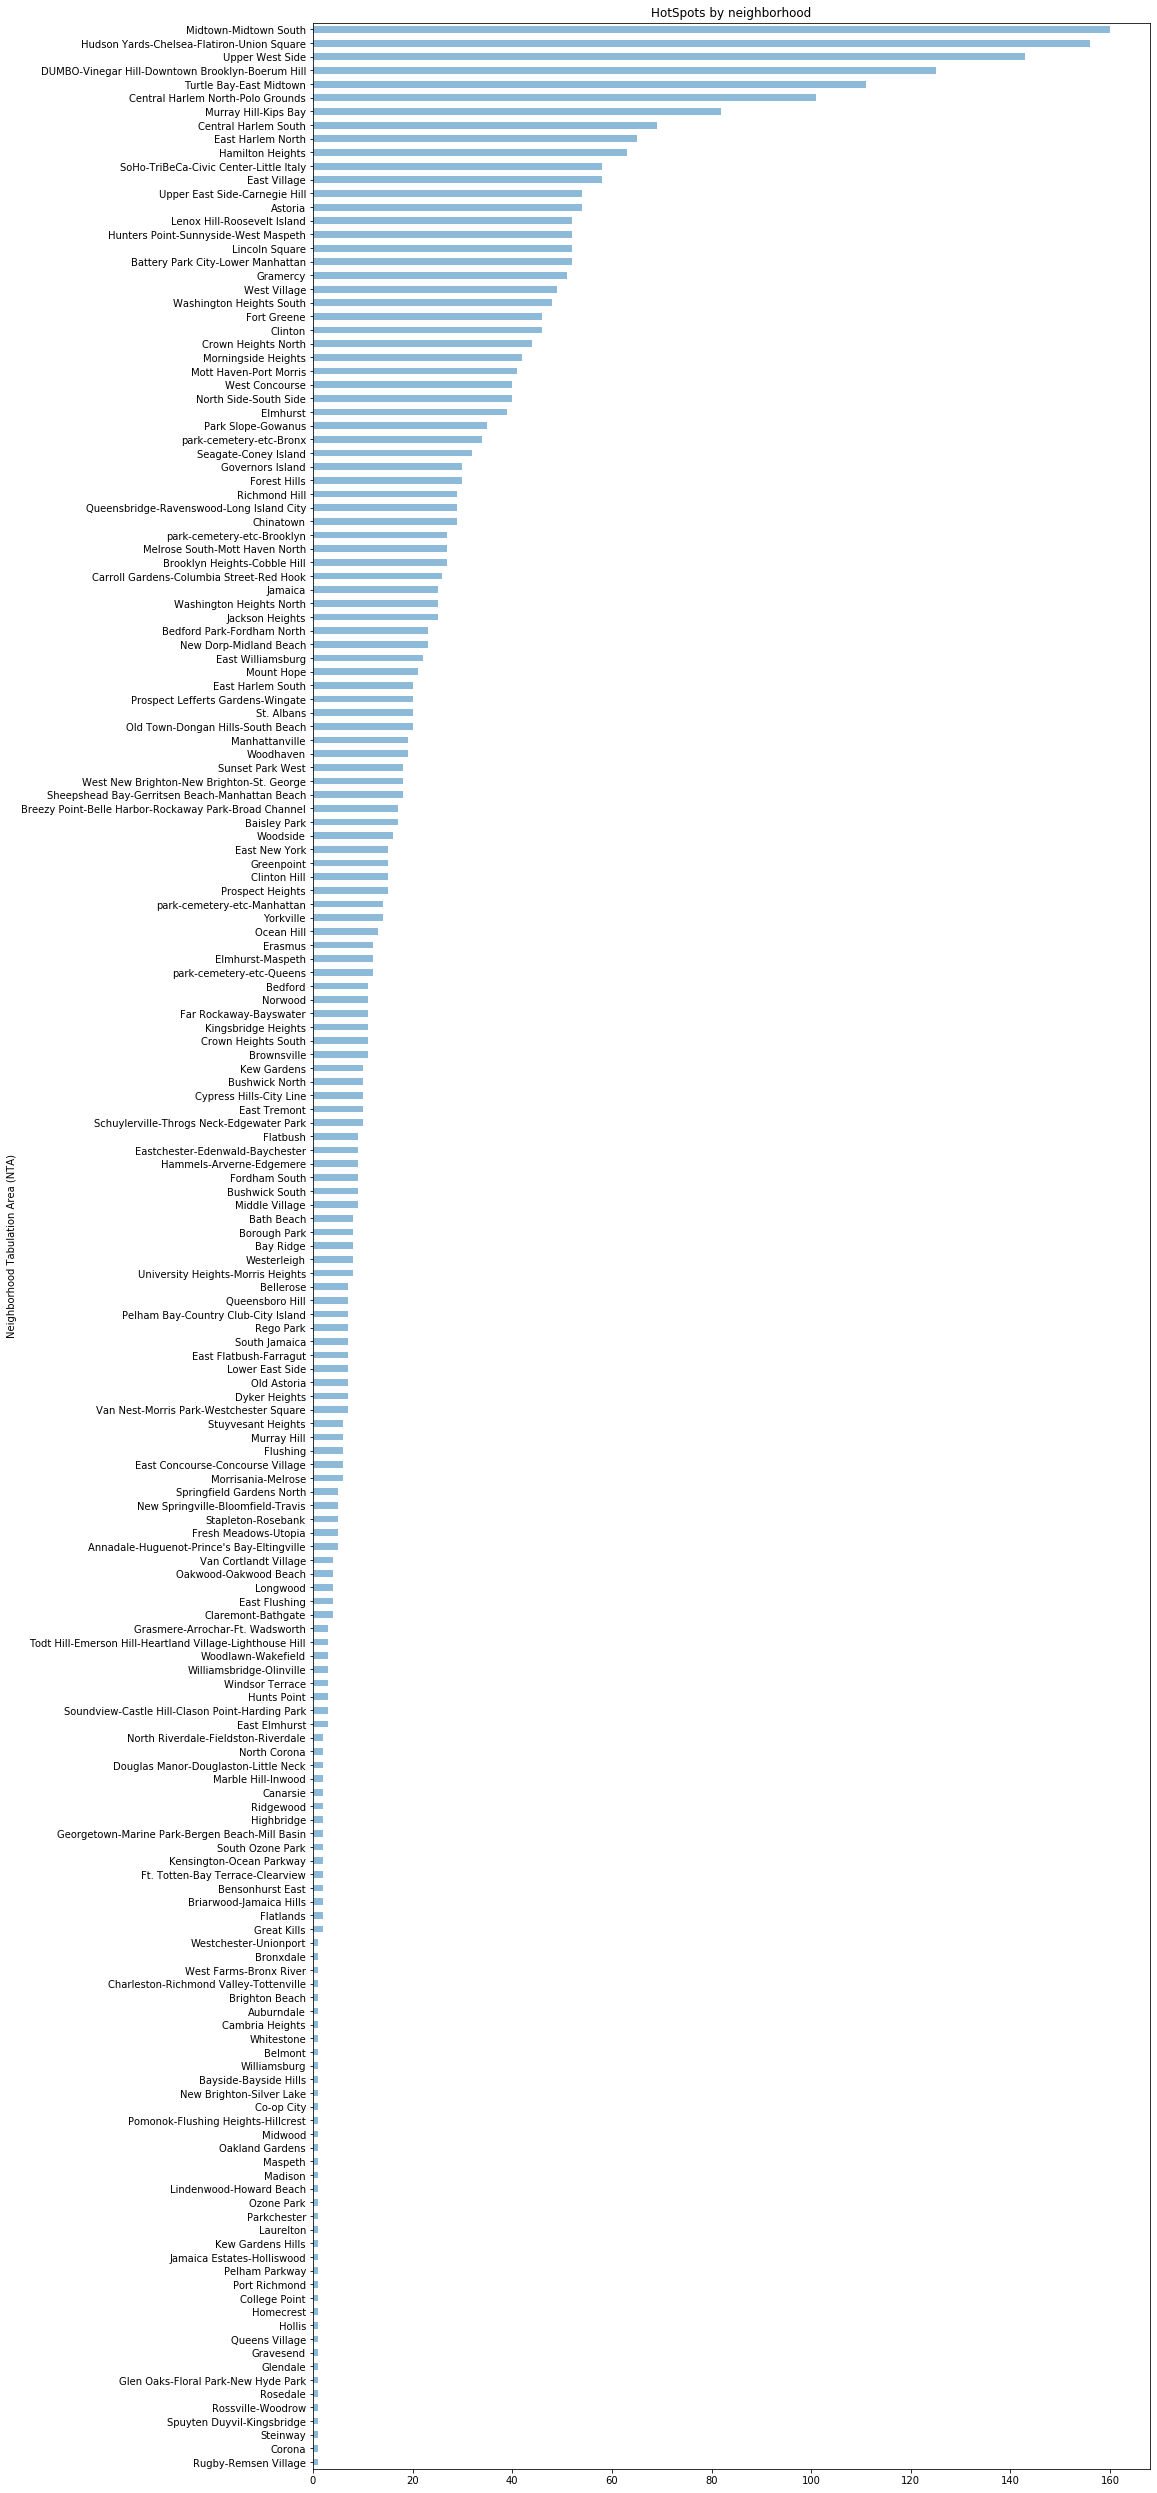

In [8]:
#How many hotspots in neighborhood.
#prov = 'LinkNYC - Citybridge'
#cond = (data['Provider'] == prov)
spots_by_neighborhood = data.groupby('Neighborhood Tabulation Area (NTA)')["OBJECTID"].count()
spots_by_neighborhood = spots_by_neighborhood.sort_values(ascending=True)
spots_by_neighborhood.plot(kind="barh", figsize=(15, 45),alpha=0.5, legend = False)
plt.title("HotSpots by neighborhood")
#plt.ylabel("Borough")
#plt.axis("Number LinkNYC")
plt.show()

In [10]:
#Adding Population Column
population_file = Path("RAW DATA/Census_Demographics_at_the_Neighborhood_Tabulation_Area__NTA__level.csv")
pop = pd.read_csv(population_file)
pop.drop(['Geographic Area - Borough', 'Geographic Area - 2010 Census FIPS County Code',
          'Total Population 2000 Number',
         'Total Population Change 2000-2010 Number',
          'Total Population Change 2000-2010 Percent'], axis = 1, inplace=True)

pop.rename(columns={'Geographic Area - Neighborhood Tabulation Area (NTA)* Code':'NTACODE',
                    'Geographic Area - Neighborhood Tabulation Area (NTA)* Name':'Neighborhood',
                    'Total Population 2010 Number':'Population'},inplace=True)

pop.head()

,NTACODE,Neighborhood,Population
0,BX01,Claremont-Bathgate,31078.0
1,BX03,Eastchester-Edenwald-Baychester,34517.0
2,BX05,Bedford Park-Fordham North,54415.0
3,BX06,Belmont,27378.0
4,BX07,Bronxdale,35538.0


In [11]:
spots_by_neighborhood.to_frame() 
final = pd.merge(spots_by_neighborhood,pop,on='Neighborhood Tabulation Area Code (NTACODE)')

KeyError: 'Neighborhood Tabulation Area Code (NTACODE)'